Author: Nicole Mazzitelli Narvaz

Construindo mapas de dispersão de velocidade.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot

from scipy.interpolate import interp2d
import scipy.interpolate
from scipy import ndimage

#from plotbin.sauron_colormap import register_sauron_colormap

from mpdaf.obj import Image, WCS

data_folder = "/home/nicole/medidas_espectros_binados_voronoi.txt"

# Import CMasher to register colormaps
import cmasher as cmr
cmap = cmr.pride

In [2]:
Bin, vel, sigma, h3, h4, chi2, dV, dsigma, dh3, dh4 = np.loadtxt('/home/nicole/eso325/medidas_espectros_binados_voronoi.txt', unpack=True) #Reads the table with the adjustment data/Lê a tabela com os dados do ajuste

"""
    Pay attention to the galaxy center. 
    In this case, the central pixel (30,30) coincides 
    with the center finded with find_my_galaxy and with the Bin Id 0.vel = vel - vel[0]
"""
vel = vel - vel[6]                                   #vel[0] velocity of central px
vrms = np.sqrt(np.array(vel)**2 + np.array(sigma)**2) #Vrms velocity
erms = np.sqrt((np.array(dV)*np.array(vel))**2 + (np.array(dsigma)*np.array(sigma))**2)/vrms #error in vrms

In [3]:
#Here data will receive velocity and var the velocity dispersion
grid = Image('/home/nicole/eso325/mapas_IdNum/Vorbin_Tag.fits', ext=1)
grid.var = grid.data.copy()


for i in range(len(Bin)):
    
    pos = np.where(grid.data.data == i)
    grid.data.data[pos] = vel[i]
    grid.var.data[pos] = sigma[i]

In [4]:
grid.var.data

array([[270.7352, 270.7352, 270.7352, ..., 269.6796, 269.6796, 269.6796],
       [270.7352, 270.7352, 270.7352, ..., 269.6796, 269.6796, 269.6796],
       [270.7352, 270.7352, 270.7352, ..., 269.6796, 269.6796, 269.6796],
       ...,
       [265.3522, 265.3522, 265.3522, ..., 269.1901, 269.1901, 269.1901],
       [265.3522, 265.3522, 265.3522, ..., 269.1901, 269.1901, 269.1901],
       [265.3522, 265.3522, 265.3522, ..., 269.1901, 269.1901, 269.1901]])

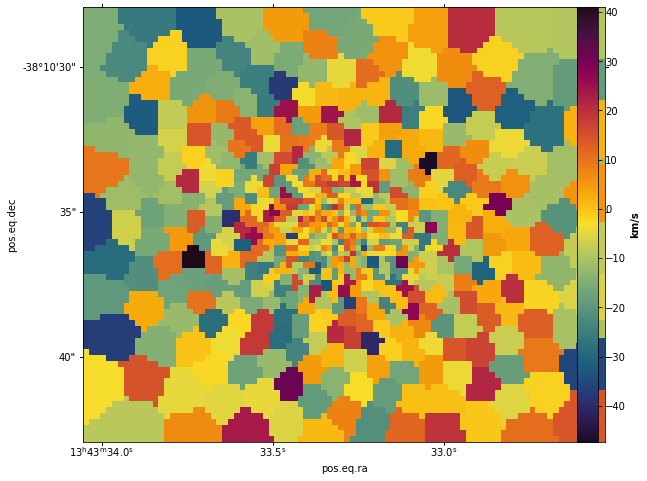

In [5]:
plt.figure(figsize=(12, 8))

cmap = cmap

fig = grid.plot(use_wcs=True, cmap=cmap, colorbar='v')  #, vmin=-20, vmax=50)

ax =  plt.subplot(projection=grid.wcs.wcs)
#plt.xlim(15,45)
#plt.ylim(15,45)




cb = plt.colorbar(fig,  pad=-0.2)
cb.set_label(label="km/s",weight='bold')

#ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.xlabel(r"pos.eq.ra", fontsize=15)
#plt.ylabel(r"pos.eq.dec", fontsize=15)

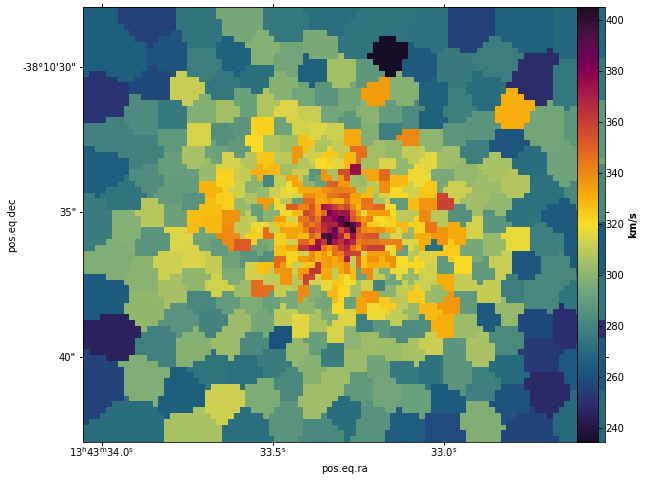

In [6]:
plt.figure(figsize=(12, 8))

cmap = cmap

fig = grid.plot(use_wcs=True, cmap=cmap, colorbar='v', var=True)#,vmin=180, vmax=255)


ax =  plt.subplot(projection=grid.wcs.wcs)
#plt.xlim(15,45)
#plt.ylim(15,45)


cb = plt.colorbar(fig,  pad=-0.2)
cb.set_label(label="km/s",weight='bold')

#ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.xlabel(r"pos.eq.ra", fontsize=15)
#plt.ylabel(r"pos.eq.dec", fontsize=15)

In [7]:
grid.write("mapa.fits")

# MAPA H3

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot

from scipy.interpolate import interp2d
import scipy.interpolate
from scipy import ndimage

from plotbin.sauron_colormap import register_sauron_colormap

from mpdaf.obj import Image, WCS

data_folder = "/home/nicole/medidas_espectros_binados_voronoi.txt"

# Import CMasher to register colormaps
import cmasher as cmr
cmap = cmr.pride

In [20]:
Bin, vel, sigma, h3, h4, chi2, dV, dsigma, dh3, dh4 = np.loadtxt('/home/nicole/eso325/medidas_espectros_binados_voronoi.txt', unpack=True) #Reads the table with the adjustment data/Lê a tabela com os dados do ajuste

"""
    Pay attention to the galaxy center. 
    In this case, the central pixel (30,30) coincides 
    with the center finded with find_my_galaxy and with the Bin Id 0.vel = vel - vel[0]
"""
h3 = h3 - h3[6]                                   
vrms = np.sqrt(np.array(h3)**2 + np.array(dh3)**2) #Vrms velocity
#erms = np.sqrt((np.array(dV)*np.array(vel))**2 + (np.array(dsigma)*np.array(sigma))**2)/vrms #error in vrms

In [21]:
#Here data will receive velocity and var the velocity dispersion
grid = Image('/home/nicole/eso325/mapas_IdNum/Vorbin_Tag.fits', ext=1)
grid.var = grid.data.copy()


for i in range(len(Bin)):
    
    pos = np.where(grid.data.data == i)
    grid.data.data[pos] = h3[i] #data: array contendo os valores de pixel da imagem.
    grid.var.data[pos] = dh3[i] #var: array contendo a variância.

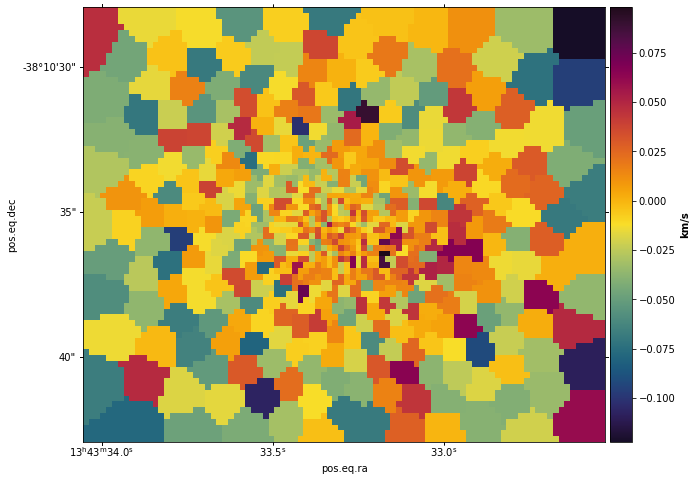

In [22]:
plt.figure(figsize=(12, 8))

cmap = cmap

fig = grid.plot(use_wcs=True, cmap=cmap, colorbar='v') #vmin=-20, vmax=50)

ax =  plt.subplot(projection=grid.wcs.wcs)
#plt.xlim(15,45)
#plt.ylim(15,45)



cb = plt.colorbar(fig,  pad=-0.1)
cb.set_label(label="km/s",weight='bold')

#ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.xlabel(r"pos.eq.ra", fontsize=15)
#plt.ylabel(r"pos.eq.dec", fontsize=15)

# MAPA H4

In [12]:
Bin, vel, sigma, h3, h4, chi2, dV, dsigma, dh3, dh4 = np.loadtxt('/home/nicole/eso325/medidas_espectros_binados_voronoi.txt', unpack=True) #Reads the table with the adjustment data/Lê a tabela com os dados do ajuste

"""
    Pay attention to the galaxy center. 
    In this case, the central pixel (30,30) coincides 
    with the center finded with find_my_galaxy and with the Bin Id 0.vel = vel - vel[0]
"""
h4 = h4 - h4[0]                                   
vrms = np.sqrt(np.array(h4)**2 + np.array(dh4)**2) #Vrms velocity
#erms = np.sqrt((np.array(dV)*np.array(vel))**2 + (np.array(dsigma)*np.array(sigma))**2)/vrms #error in vrms

In [13]:
#Here data will receive velocity and var the velocity dispersion
grid = Image('/home/nicole/eso325/mapas_IdNum/Vorbin_Tag.fits', ext=1)
grid.var = grid.data.copy()


for i in range(len(Bin)):
    
    pos = np.where(grid.data.data == i) 
    grid.data.data[pos] = h4[i] #data: array contendo os valores de pixel da imagem.
    grid.var.data[pos] = dh4[i] #var: array contendo a variância.

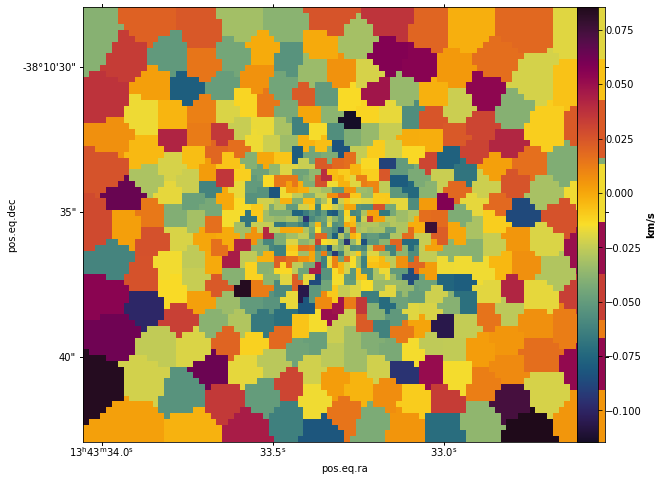

In [19]:
plt.figure(figsize=(12, 8))

cmap = cmap

fig = grid.plot(use_wcs=True, cmap=cmap, colorbar='v') #var=True vmin=180, vmax=255)


ax =  plt.subplot(projection=grid.wcs.wcs)
#plt.xlim(15,45)
#plt.ylim(15,45)


cb = plt.colorbar(fig,  pad=-0.2)
cb.set_label(label="km/s",weight='bold')

#ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
#plt.xlabel(r"pos.eq.ra", fontsize=15)
#plt.ylabel(r"pos.eq.dec", fontsize=15)